In [7]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [8]:
df = pd.read_csv("primary-energy-cons.csv")
df

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,7.790772
1,Afghanistan,AFG,1981,8.777320
2,Afghanistan,AFG,1982,9.348327
3,Afghanistan,AFG,1983,11.436162
4,Afghanistan,AFG,1984,11.489043
...,...,...,...,...
12175,Zimbabwe,ZWE,2017,45.256546
12176,Zimbabwe,ZWE,2018,51.809430
12177,Zimbabwe,ZWE,2019,46.119940
12178,Zimbabwe,ZWE,2020,41.996760


In [9]:
country_list = [
    "Afghanistan", "Albania", "Algeria", "American Samoa", "Angola", "Antarctica", "Antigua and Barbuda", "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "British Virgin Islands", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Canada", "Cape Verde", "Cayman Islands", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Cook Islands", "Costa Rica", "Côte d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czechia", "Democratic Republic of Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "East Timor", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Falkland Islands", "Faroe Islands", "Fiji", "Finland", "France", "French Guiana", "French Polynesia", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Greenland", "Grenada", "Guadeloupe", "Guam", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Lithuania", "Luxembourg", "Macao", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Martinique", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Mongolia", "Montenegro", "Montserrat", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "Netherlands Antilles", "New Caledonia", "New Zealand", "Nicaragua", "Niger", "Nigeria", "Niue", "North Korea", "North Macedonia", "Northern Mariana Islands", "Norway", "Oman", "Pakistan", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico", "Qatar", "Réunion", "Romania", "Russia", "Rwanda", "Saint Helena", "Saint Kitts and Nevis", "Saint Lucia", "Saint Pierre and Miquelon", "Saint Vincent and the Grenadines", "Samoa", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Turks and Caicos Islands", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "United States Virgin Islands", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Western Sahara", "Yemen", "Zambia", "Zimbabwe"
]

In [10]:
countries = df[df["Entity"].isin(country_list)]
country_energy_consumption = countries.groupby("Entity")["Primary energy consumption (TWh)"].sum().reset_index()

country_energy_consumption

,Entity,Primary energy consumption (TWh)
0,Afghanistan,741.911130
1,Albania,1477.097653
2,Algeria,18760.354212
3,American Samoa,86.958440
4,Angola,2169.829460
...,...,...
210,Vietnam,19343.531831
211,Western Sahara,40.145036
212,Yemen,2358.132701
213,Zambia,1639.718953


In [11]:
top_10_countries = country_energy_consumption.sort_values(by="Primary energy consumption (TWh)", ascending=False).head(10)

def make_pretty(styler):
    styler = styler.background_gradient(cmap='Blues', subset=["Primary energy consumption (TWh)"])
    styler = styler.format({"Primary energy consumption (TWh)": "{:,.2f}"})
    styler = styler.set_table_styles({
        'Entity': [{'selector': 'th', 'props': 'font-weight: bold; text-align: center;'}],  # Bold headers
        'Primary energy consumption (TWh)': [{'selector': 'td', 'props': 'text-align: right;'}],  # Right align numbers
    })
    
    return styler

top_10_countries.style.pipe(make_pretty)

,Entity,Primary energy consumption (TWh)
204,United States,"1,353,940.25"
40,China,"922,517.26"
159,Russia,"322,911.65"
98,Japan,"291,177.82"
74,Germany,"228,102.75"
90,India,"221,080.69"
34,Canada,"184,755.23"
68,France,"150,708.96"
203,United Kingdom,"144,111.42"
26,Brazil,"116,332.58"


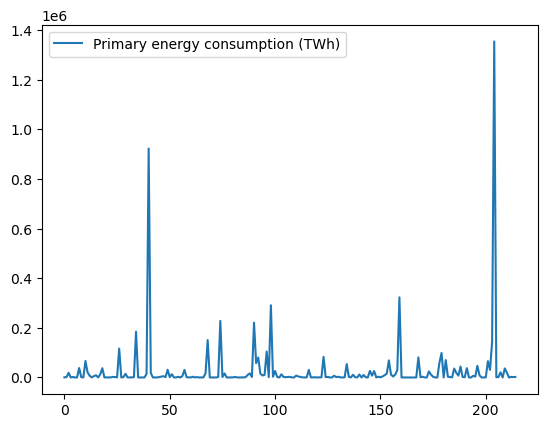

In [12]:
country_energy_consumption.plot()
plt.savefig('country_energy_consumption.png', bbox_inches='tight')
plt.show()

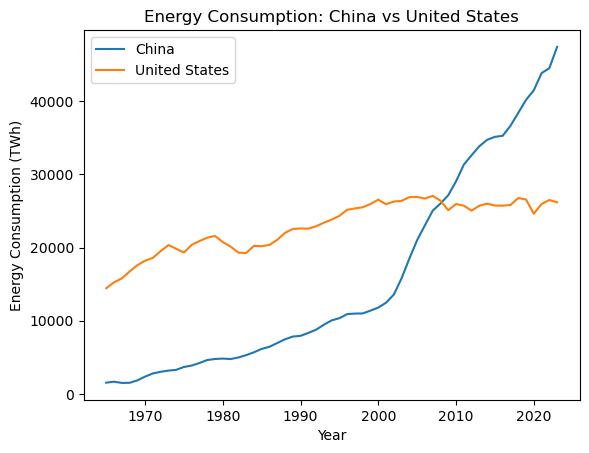

In [13]:
china_data = df[df["Entity"] == "China"]
us_data = df[df["Entity"] == "United States"]

plt.plot(china_data["Year"], china_data["Primary energy consumption (TWh)"], label="China")
plt.plot(us_data["Year"], us_data["Primary energy consumption (TWh)"], label="United States")
plt.title('Energy Consumption: China vs United States')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()

plt.savefig('us_vs_china.png', bbox_inches='tight')
plt.show()

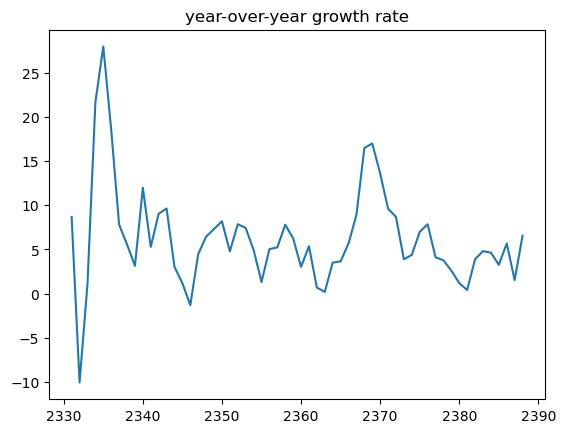

In [14]:
china_data = china_data.copy()  # Make an explicit copy of the DataFrame
china_data['YoY Growth'] = china_data['Primary energy consumption (TWh)'].pct_change() * 100
china_data['YoY Growth'].plot()

plt.savefig('yoy.png', bbox_inches='tight')
plt.title("year-over-year growth rate")
plt.show()

In [15]:
mean_consumption = us_data['Primary energy consumption (TWh)'].mean()
mean_consumption

22948.13981355932

In [16]:
std_dev = us_data['Primary energy consumption (TWh)'].std()
std_dev

3456.019899264453

In [17]:
anomalies = us_data[abs(us_data['Primary energy consumption (TWh)'] - mean_consumption) > 2 * std_dev]
anomalies

,Entity,Code,Year,Primary energy consumption (TWh)
11428,United States,USA,1965,14439.700
11429,United States,USA,1966,15247.363
11430,United States,USA,1967,15778.539


Mean Absolute Error: 1173.1322696626346
Predicted Energy Consumption for 2024: 28488.51 TWh
Predicted Energy Consumption for 2030: 29579.54 TWh
Predicted Energy Consumption for 2035: 30488.74 TWh
Predicted Energy Consumption for 2040: 31397.93 TWh
Predicted Energy Consumption for 2045: 32307.13 TWh
Predicted Energy Consumption for 2050: 33216.32 TWh


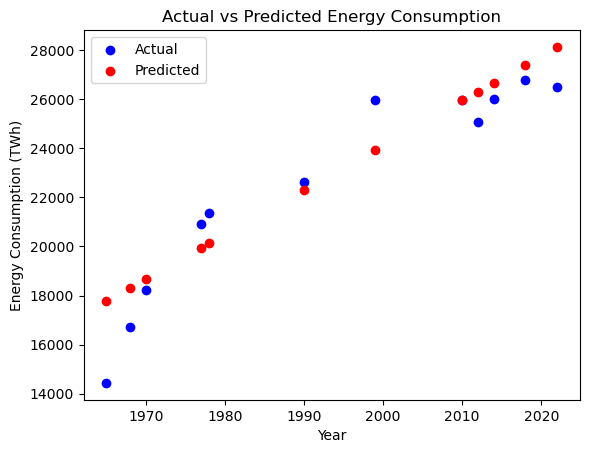

In [18]:
us_data = df[df['Entity'] == 'United States']
us_data = us_data.sort_values('Year')

X = us_data[['Year']] 
y = us_data['Primary energy consumption (TWh)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

future_years = pd.DataFrame({'Year': [2024, 2030, 2035, 2040, 2045, 2050]})
future_predictions = model.predict(future_years)

# Display the predictions
for year, consumption in zip(future_years['Year'], future_predictions):
    print(f'Predicted Energy Consumption for {year}: {consumption:.2f} TWh')

# Plotting the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()

plt.savefig('prediction.png', bbox_inches='tight')
plt.show()